### Use the ux_2D and uy_2D in pressure to draw streamlines

In [19]:
from scipy.signal import butter, filtfilt
def butter_lowpass_filter(data, CUT=4, N=512):
    """A helper function that performs lowpass filtering."""
    T = 1           # Sample Period
    fs = N        # Sample rate, Hz (should be the xarray size)
    cutoff = CUT    # desired cutoff frequency of the filter, Hz
    nyq = 0.5 * fs  # Nyquist Frequency
    order = 4       # sin wave can be approximately represented as quadratic
    n = int(T * fs) # total number of samples
    normal_cutoff = cutoff / nyq
    # Get the filter coefficients 
    b, a = butter(order, normal_cutoff, btype='low', analog=False)
    y = filtfilt(b, a, data)
    return y

In [ ]:
"""Time averaging"""
fig = plt.figure(figsize=[4,3])
case = case1
ux_tmean = np.average(case.ux_2D, axis=0) # Time average of the 2D
uy_tmean = np.average(case.uy_2D, axis=0) # Time average of the 2D

# from mpl_toolkits.axes_grid1 import ImageGrid
# fig = plt.figure(figsize=(10,2))
# ax = plt.gca()
# grid = ImageGrid(fig, 111,          # as in plt.subplot(111)
#                  nrows_ncols=(2,4),
#                  axes_pad=0.05,
#                  share_all=True,
#                  cbar_location="right",
#                  cbar_mode="single",
#                  cbar_size="3%",
#                  cbar_pad=0.05,
#                  )


"""u instantaneous"""
# img = plt.imshow(np.rot90(case.ux[0]/0.25), cmap='RdBu', extent=[-np.pi,np.pi,0,2*np.pi],
#                  vmax = 10, vmin = -10) 
# plt.title(r'$u_x(x,z,t)$')
"""u bar (time average)"""
img = plt.imshow(np.rot90(ux_tmean/0.25), cmap='RdBu', extent=[-np.pi,np.pi,0,2*np.pi],
                 vmax = 10, vmin = -10)
plt.title(r'$\bar{u}_x(x,z)$')
"""u prime"""
# img = plt.imshow(np.rot90(case.ux[0]/0.25)-np.rot90(ux_tmean/0.25), cmap='RdBu', extent=[-np.pi,np.pi,0,2*np.pi],
#                  vmax = 1, vmin = -1) 
# plt.title(r'$u_x^{\prime}(x,z,t)$')

ux_txmean = np.tile(np.average(ux_tmean, axis=0), (case.N,1)) # axis 0 is x, axis 1 is z
uy_txmean = np.tile(np.average(uy_tmean, axis=0), (case.N,1))

"""<u bar>"""
# img = plt.imshow(np.rot90(ux_txmean)/0.25, cmap='RdBu', extent=[-np.pi,np.pi,0,2*np.pi],
#                  vmax = 10, vmin = -10) 
# plt.title(r'$\langle\bar{u}_x\rangle(z)$')

"""u tilde"""
# img = plt.imshow(np.rot90(ux_tmean - ux_txmean)/0.25, cmap='RdBu', extent=[-np.pi,np.pi,0,2*np.pi],
#                  vmax = 1, vmin = -1) 
# plt.title(r'$\tilde{u}_x(x,z)$')

plt.axis('off')
L0 = 2*np.pi; NGRID = 512
xarray = np.linspace(-L0/2.,L0/2.,NGRID,endpoint=False)+L0/2**NGRID/2
plt.plot(xarray, np.average(case.phase['eta'][0],axis=0), c='k', lw=1)

In [120]:
case = case1
case.uxmean = np.average(case.ux_2D, axis=(0))
case.uxmean_crest = np.average(case.ux_2D[0][0:512:128,:], axis=(0))
case.uxmean_trough = np.average(case.ux_2D[0][63:512:128,:], axis=(0))
case.yarray = np.linspace(-1,case.L0-1,case.N,endpoint=False)+case.L0/2**case.N/2

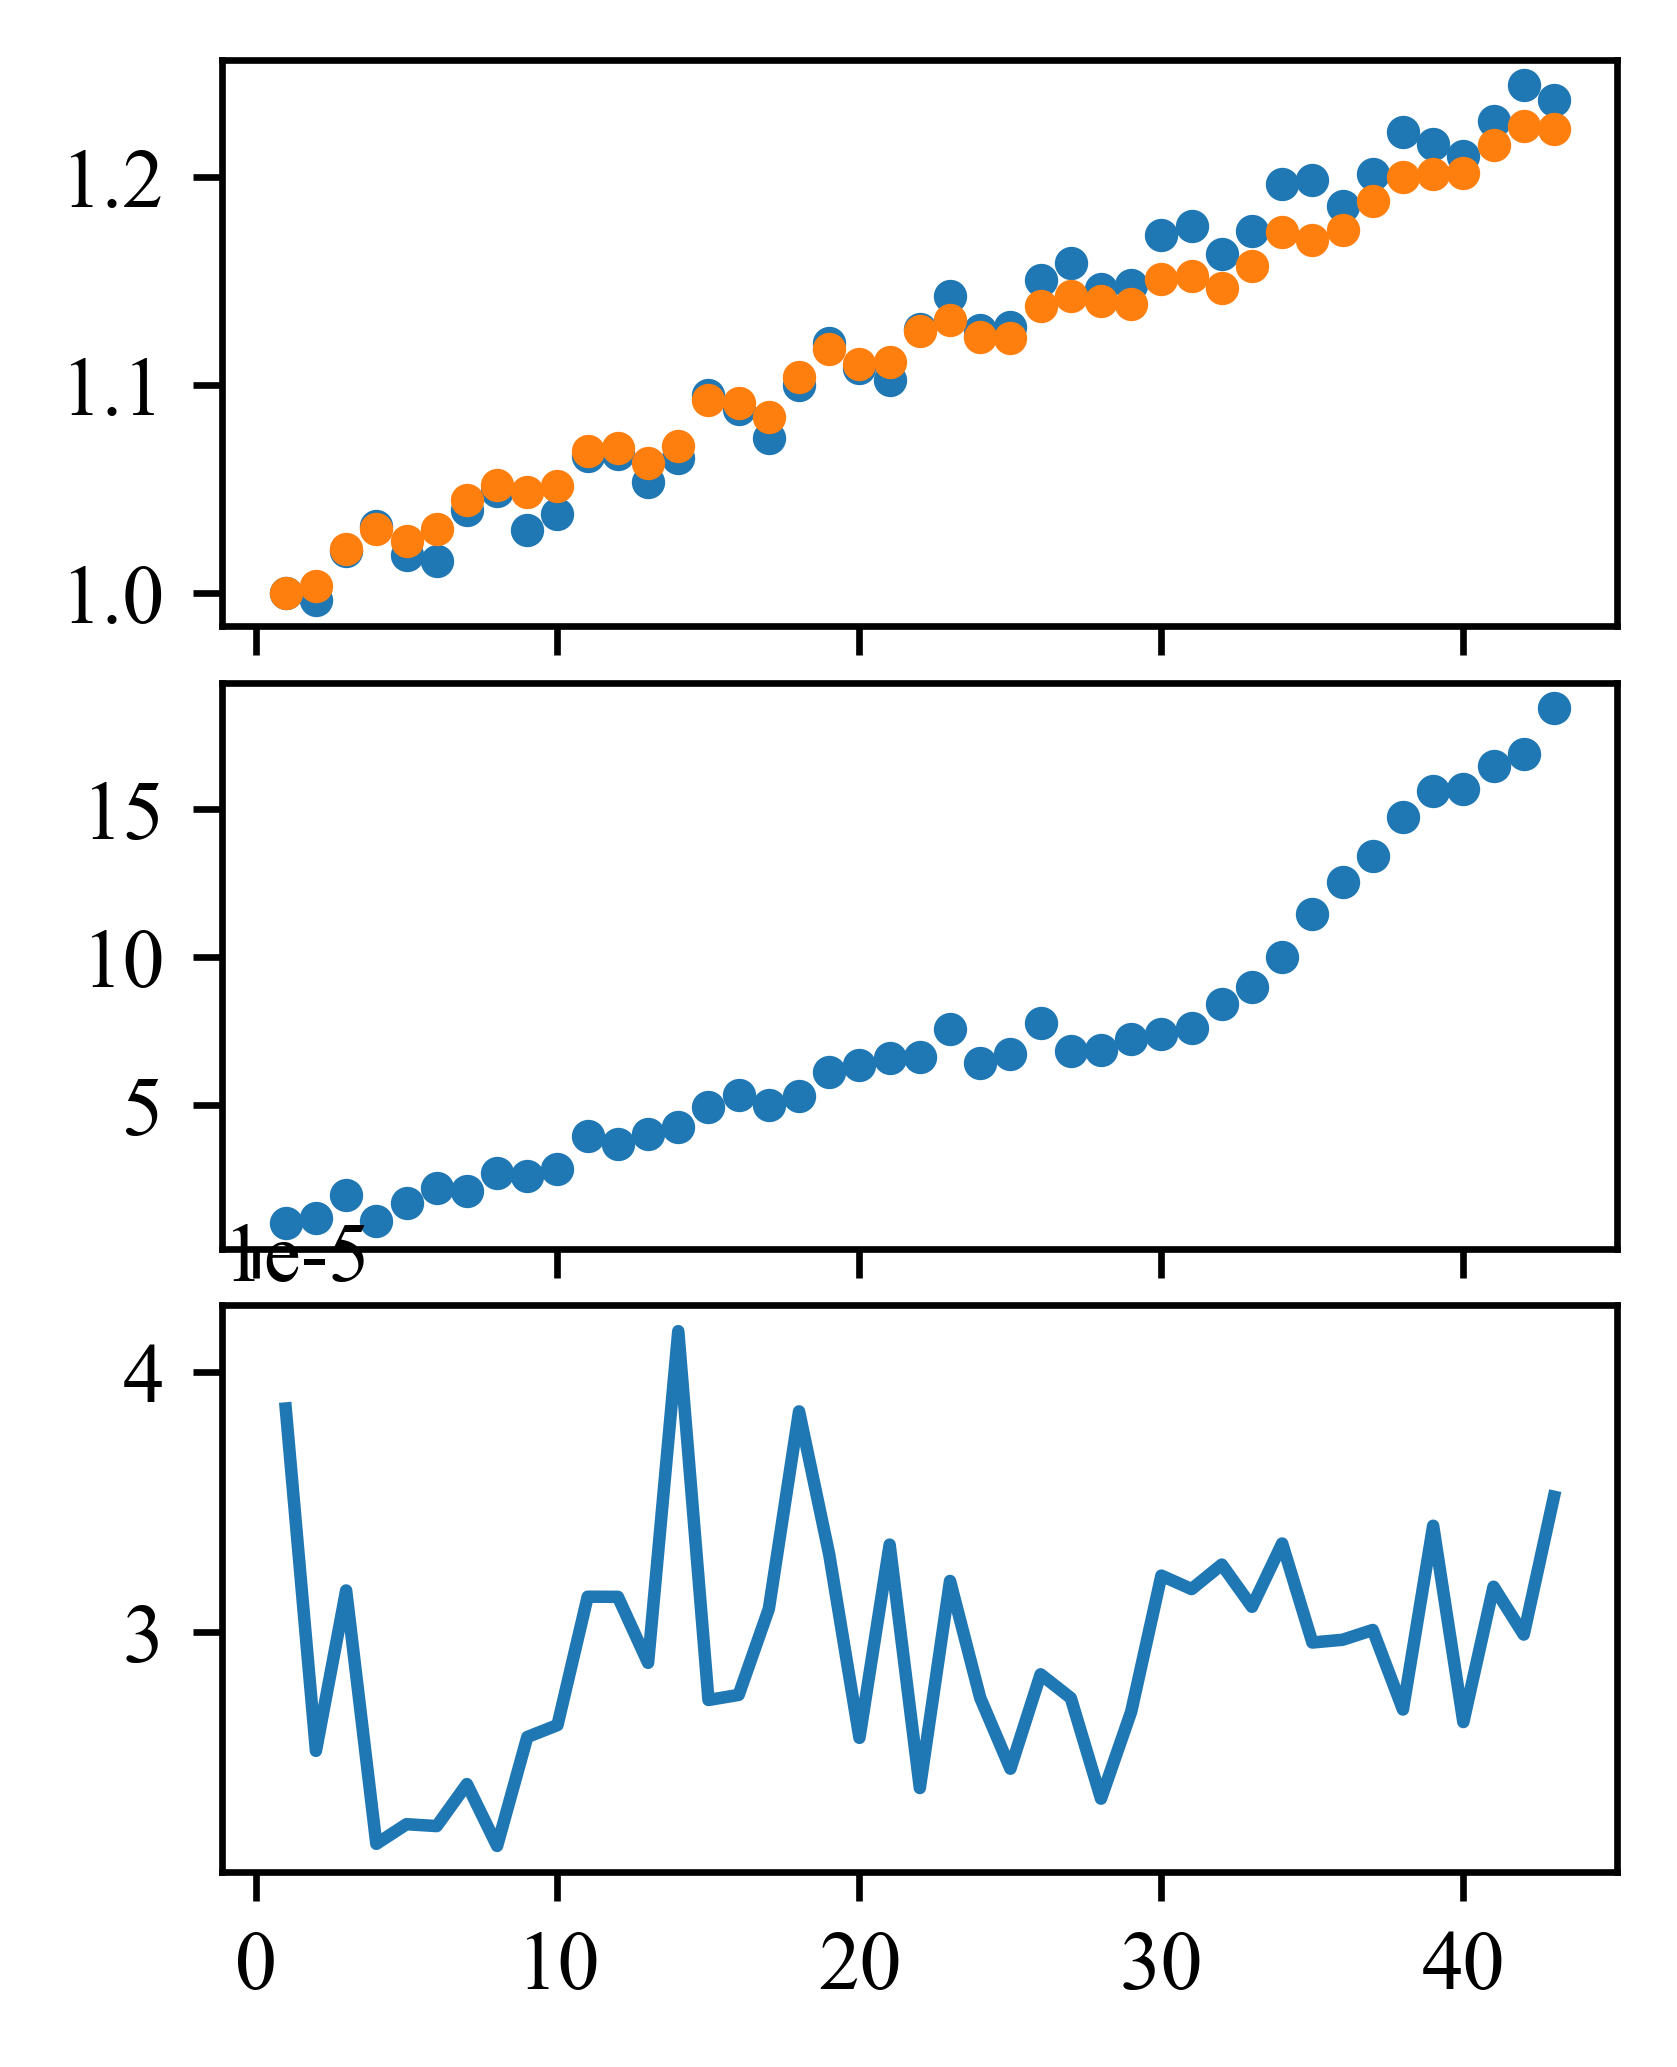

In [186]:
""" FIGURE: show the developement of roughness elements """
    
figure, (ax0, ax1, ax2) = plt.subplots(3, 1, gridspec_kw={'height_ratios': [1,1,1], "hspace":0.1}, 
                                       sharex=True, figsize=[3,4])
case = case2

def eta_spectrum (eta, peak=4, N=512):
    spectrum = np.fft.fft2(eta-np.average(eta))*(1/N)**2 # TODO: How to normalize here?!
    F = np.absolute(spectrum)
    Ep = np.average(F,axis=0)[peak] # Only record the peak frequency spetrum amplitude
    return Ep

""" Plot different variation """
case.E_rms_raw = [np.std(eta)**2 for eta in case.phase['eta']] # eta centered around 1
case.Ep = [eta_spectrum(eta) for eta in case.phase['eta']]
case.E_y = [np.std(eta - np.tile(np.average(eta, axis=0), (512,1)))**2 for eta in case.phase['eta']]
case.E_x = [np.std(eta - np.rot90(np.tile(np.average(eta, axis=1)[::-1], (512,1))))**2 for eta in case.phase['eta']]
ax0.plot(case.phase['t'], case.E_rms_raw/case.E_rms_raw[0],'.')
ax0.plot(case.phase['t'], case.Ep/case.Ep[0],'.')
# ax0.plot(case.phase['t'], case.E_x/case.E_rms_raw[0],'.') # Not really changing
ax1.plot(case.phase['t'], case.E_y/case.E_y[0],'.')

ax2.plot(case.p['t'], case.Fp)

1
11


(1, 600)

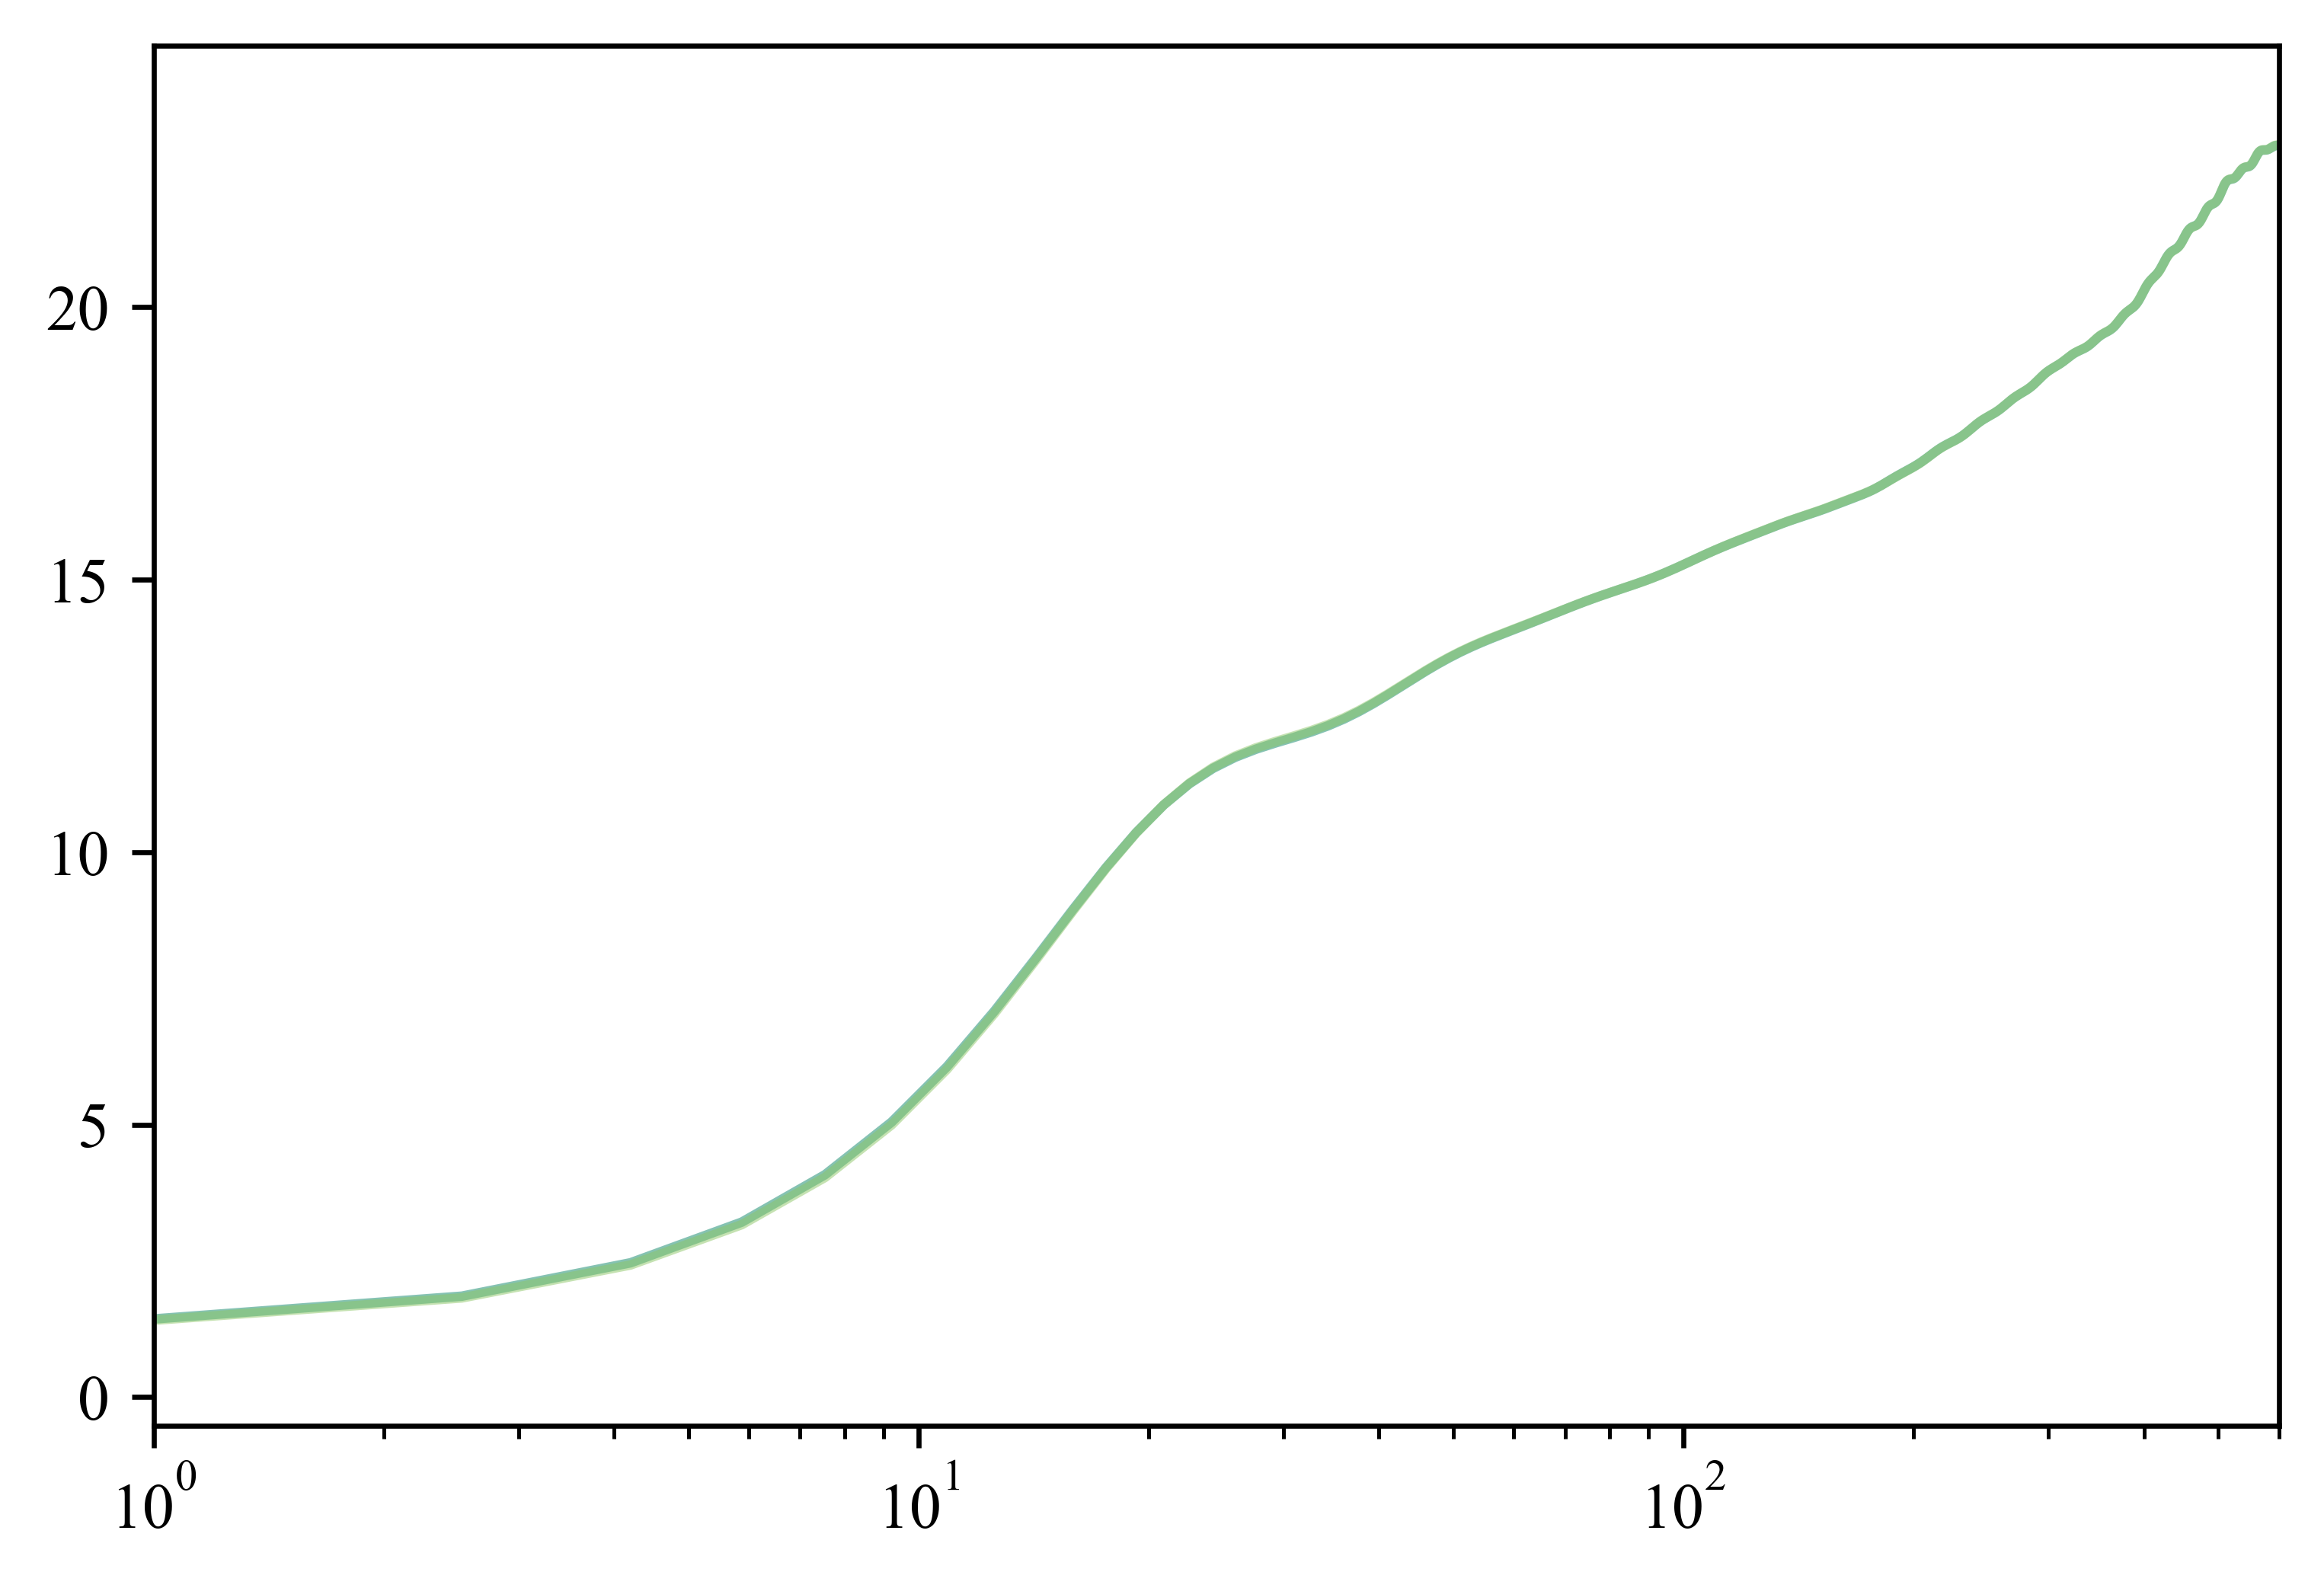

In [221]:
case = case9
case.uxmean = np.average(case.ux_2D, axis=(0))
# case.uxmean_crest = np.average(case.ux_2D[0][0:512:128,:], axis=(0))
# case.uxmean_trough = np.average(case.ux_2D[0][63:512:128,:], axis=(0))
case.yarray = np.linspace(-1,case.L0-1,case.N,endpoint=False)+case.L0/2**case.N/2

for i,t in enumerate(case.field_t[::10]):
#     etai = np.where(np.isclose(case.phase['t'], t))[0][0]
#     pi = np.where(np.isclose(case.p['t'], t))[0][0]
#     eta = case.phase['eta'][eta_i] # eta axis 0 is y, eta axis 1 is x
#     eta_yaver = np.tile(np.average(eta, axis=0), (512,1))
#     E_y = np.average((eta - eta_yaver)**2)
    print(t)
    start = 80; ytau = (2*np.pi-1)/720
    ux_simu = case.uxmean[i][start:-1]/case.ustar
    ux_smooth = butter_lowpass_filter(ux_simu, CUT=32, N=512)
    plt.plot(case.yarray[start:-1]/ytau, ux_smooth, color=plt.get_cmap('summer')(t/case.field_t[-1]), alpha=0.5)    
plt.xscale('log')
plt.xlim([1,600])

In [ ]:
eta = case.phase['eta'][40]
eta_yaver = np.tile(np.average(eta-1, axis=0), (512,1))
eta_xaver = np.rot90(np.tile(np.average(eta-1, axis=1)[::-1], (512,1)))
print(eta_xaver.max())
fig = plt.figure ()
pcontour = plt.imshow(eta_xaver, cmap='RdBu', vmax=0.001, vmin=-0.001)
ax = plt.gca()

cb_ax = fig.add_axes([0.95, 0.68, 0.01, 0.15])
v1 = np.linspace(-1, 1, 3, endpoint=True)
cbar = fig.colorbar(pcontour, orientation="vertical", cax=cb_ax)
# cbar.ax.text(0.5, 1.2, r'$\overline{w}/u_{\ast}$', ha='center', va='center', transform=cbar.ax.transAxes)

(13, 512, 512)


/tmp/ipykernel_281721/3121048424.py:142: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


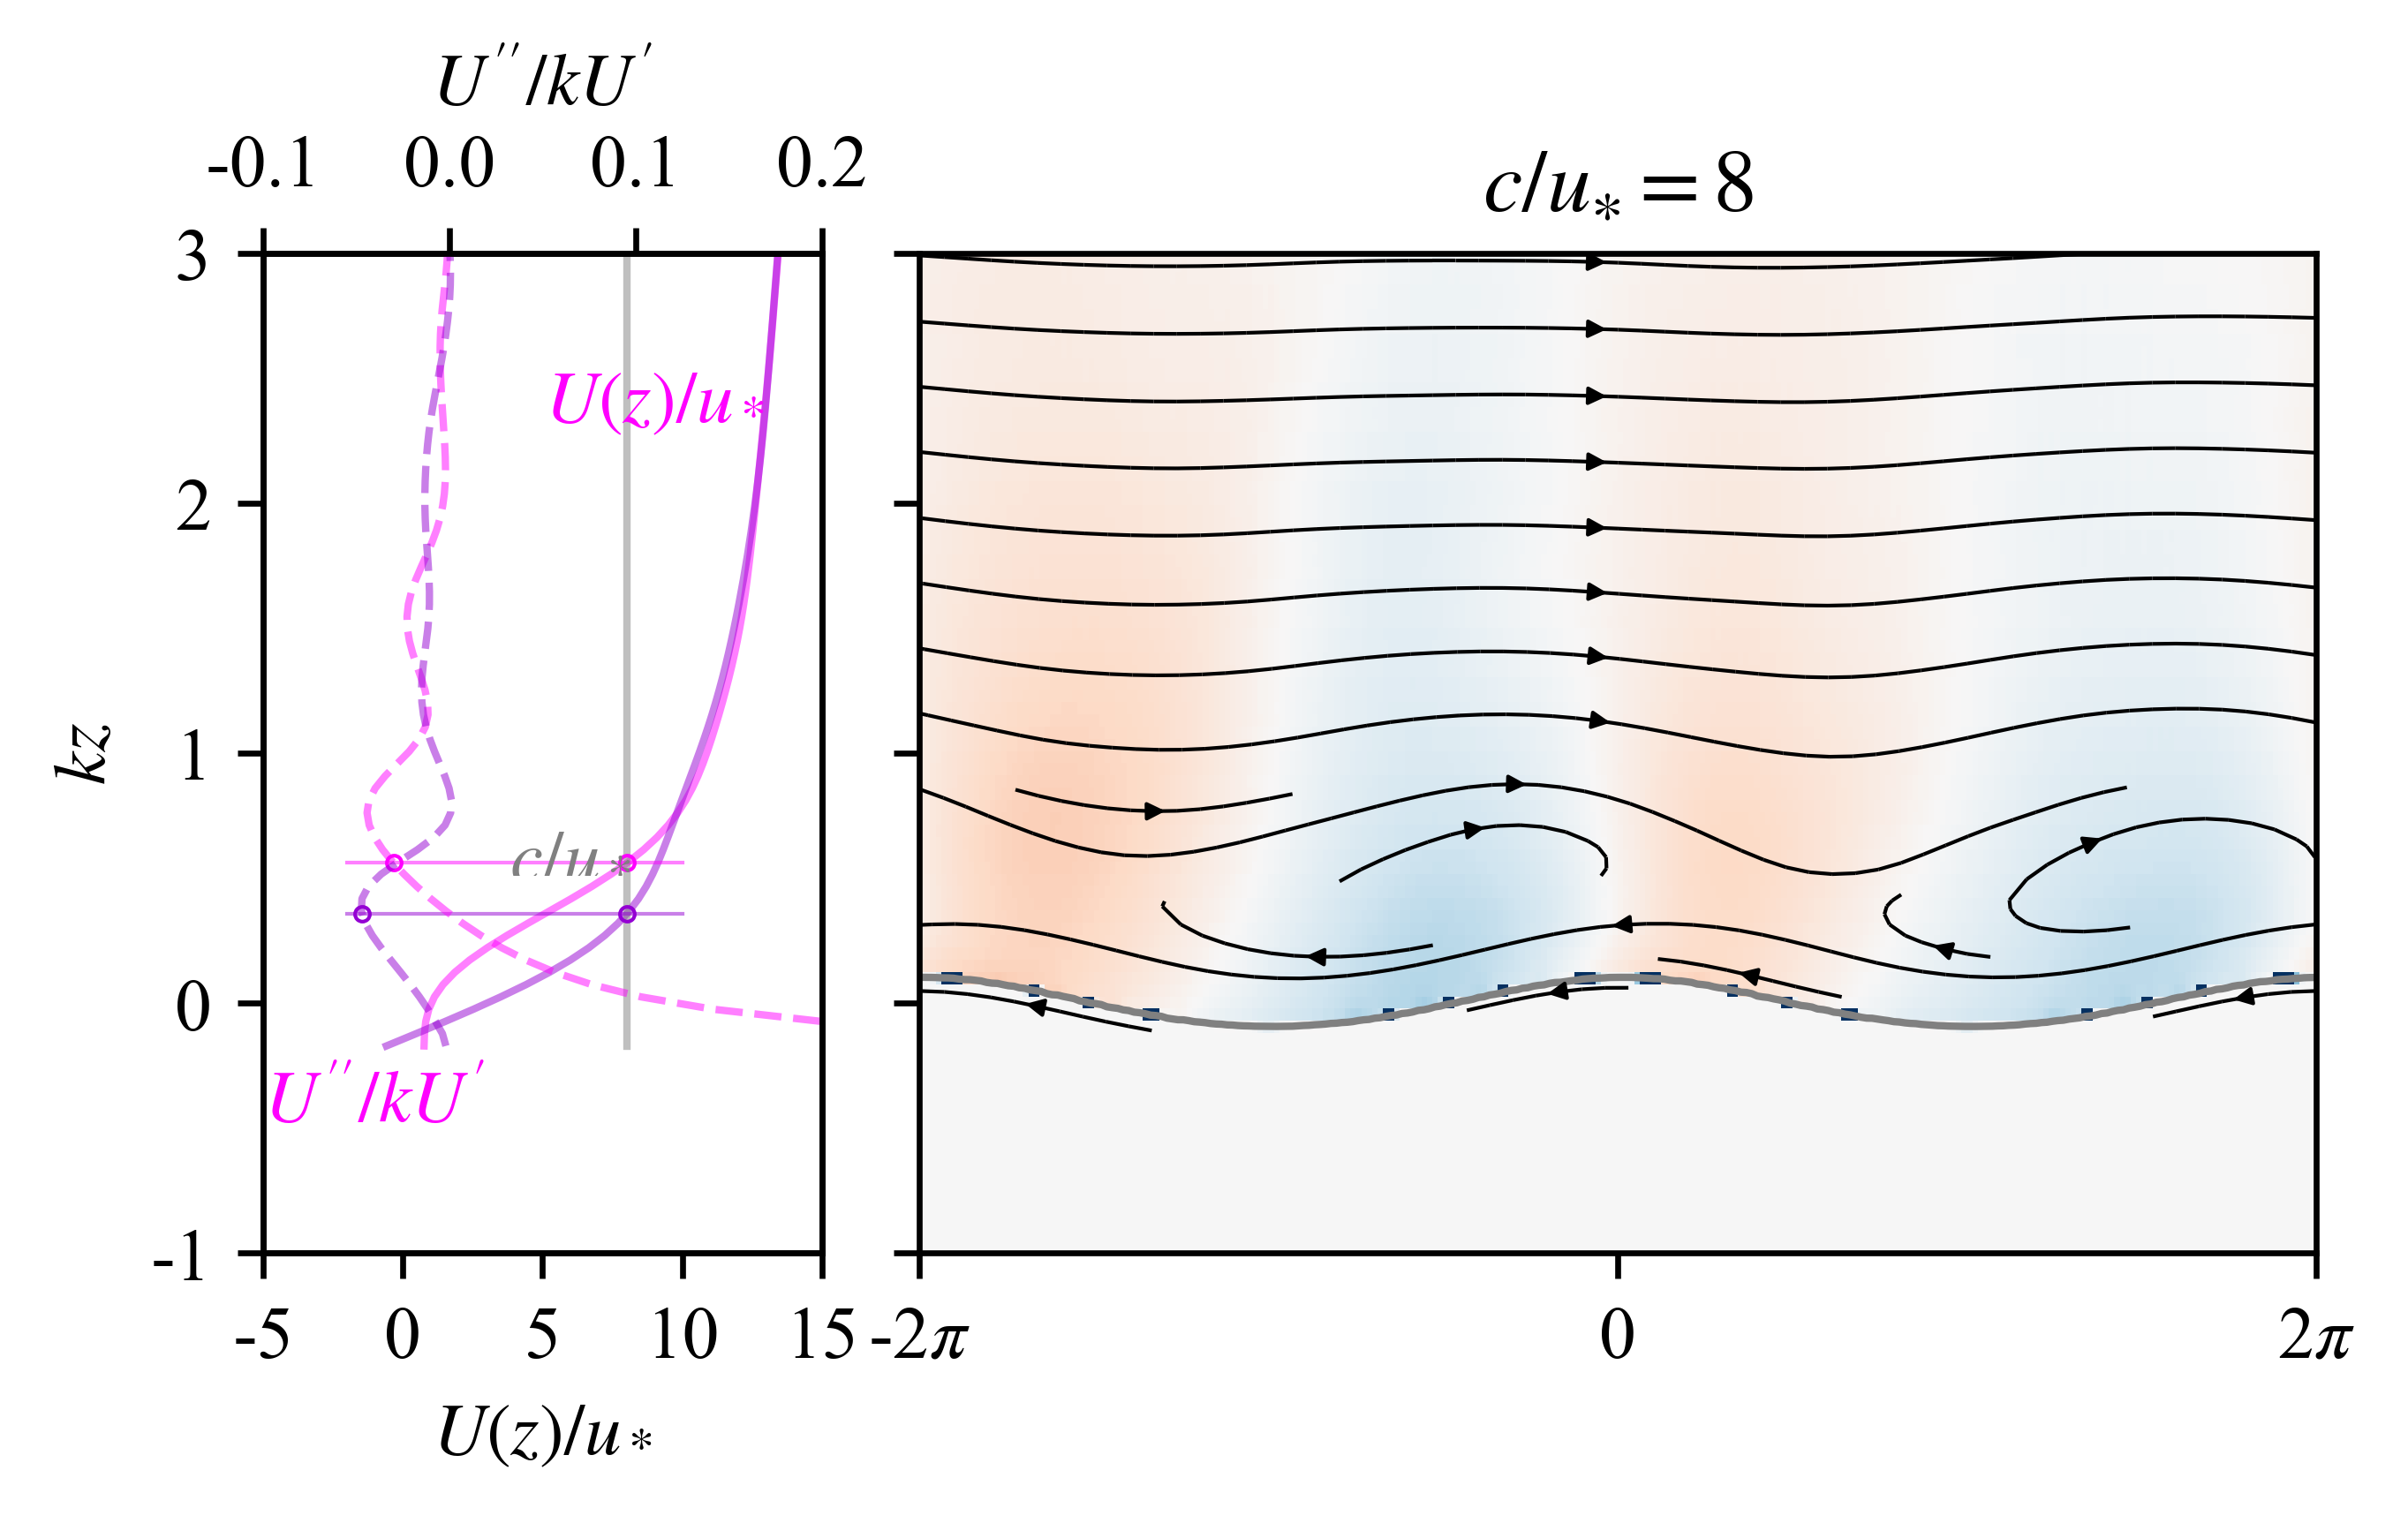

In [28]:
""" Draw mean side by side with streamlines """
from shapely.geometry import LineString # For finding intersection
figure, (ax0, ax1) = plt.subplots(1, 2, gridspec_kw={'width_ratios': [1,2.5], "wspace":0.1}, 
                                  sharey=True, figsize=[5,2.5])

""" Mean profile """
def draw_gradient (case, cchoice, ax):
    """ 
        Returns:
            (x1,y1,x2,y2): the Miles quantity and the critical height kl_c for both the crest and the trough 
    """
    start = 78
    case.ux_2D = np.array(case.ux_2D); print(case.ux_2D.shape)
    case.uxmean_crest = np.average(case.ux_2D[:,0:512:128,:], axis=(0,1))
    case.uxmean_trough = np.average(case.ux_2D[:,63:512:128,:], axis=(0,1))
    case.yarray = np.linspace(-1,case.L0-1,case.N,endpoint=False)+case.L0/2**case.N/2
#     ux_simu = (np.average(case.uxmean, axis=0)[start:-1])/case.ustar
#     ux_smooth = butter_lowpass_filter(ux_simu, CUT=32, N=512)
#     ax.plot(ux_smooth,case.yarray[start:-1]*case.k, color=cchoice, alpha=0.5)
    """ Crest """
    ux_smooth_crest = butter_lowpass_filter(case.uxmean_crest[start:-1]/case.ustar, CUT=32, N=512)
    ax.plot(ux_smooth_crest,case.yarray[start:-1]*case.k, color='magenta', lw=1, alpha=0.5)
    """ Trough """
    ux_smooth_trough = butter_lowpass_filter(case.uxmean_trough[start:-1]/case.ustar, CUT=32, N=512)
    ax.plot(ux_smooth_trough,case.yarray[start:-1]*case.k, color='darkviolet', lw=1, alpha=0.5)
    
    """ Find the critical height """
    carray = np.ones(len(ux_smooth_crest))*case.wave.c/case.ustar
    ax.plot(carray,case.yarray[start:-1]*case.k, color='gray', lw=1, alpha=0.5)
    first_line = LineString(np.column_stack((carray, case.yarray[start:-1]*case.k)))
    second_line = LineString(np.column_stack((ux_smooth_crest, case.yarray[start:-1]*case.k)))
    intersection = first_line.intersection(second_line)
    x,y = intersection.xy
    ax.plot(x[0], y[0], marker='o', mfc='none', lw=0, markersize=2, color='magenta', markeredgewidth=0.5)
    """ Compute the Miles quantity at the height """
    quant = np.gradient(np.gradient(ux_smooth_crest))/np.gradient(ux_smooth_crest)/case.k # Miles quantity
    first_line = LineString(np.column_stack((quant, case.yarray[start:-1]*case.k)))
    second_line = LineString(np.column_stack((np.linspace(-2,20,len(ux_smooth_crest)), np.ones(len(ux_smooth_crest))*y[0])))
    intersection = first_line.intersection(second_line)
    x1,y1 = intersection.xy
    ax.plot(np.linspace(-2,10,len(ux_smooth_trough)), np.ones(len(ux_smooth_crest))*y[0], lw=0.5, color='magenta', alpha = 0.5)
    """ A second axis for Miles quantity """
    ax_ = ax.twiny()  # instantiate a second axes that shares the same x-axis
    ax_.set_xlim([-0.1,0.2])
    ax_.set_xticks((-0.1,0,0.1,0.2))
    ax_.set_xlabel(r'$U^{\prime\prime}/kU^{\prime}$')  # we already handled the x-label with ax1
    ax_.plot(quant, case.yarray[start:-1]*case.k, '--', color='magenta', lw=1, alpha = 0.5)
    ax_.plot(x1[0], y1[0], marker='o', mfc='none', lw=0, markersize=2, color='magenta', markeredgewidth=0.5)
    
    """ Same for the trough """
    first_line = LineString(np.column_stack((carray, case.yarray[start:-1]*case.k)))
    second_line = LineString(np.column_stack((ux_smooth_trough, case.yarray[start:-1]*case.k)))
    intersection = first_line.intersection(second_line)
    x,y = intersection.xy
    ax.plot(x[0], y[0], marker='o', mfc='none', lw=0, markersize=2, color='darkviolet', markeredgewidth=0.5)
    """ Compute the Miles quantity at the height """
    quant = np.gradient(np.gradient(ux_smooth_trough))/np.gradient(ux_smooth_trough)/case.k # Miles quantity
    first_line = LineString(np.column_stack((quant, case.yarray[start:-1]*case.k)))
    second_line = LineString(np.column_stack((np.linspace(-2,10,len(ux_smooth_trough)), np.ones(len(ux_smooth_trough))*y[0])))
    intersection = first_line.intersection(second_line)
    x2,y2 = intersection.xy
    ax.plot(np.linspace(-2,10,len(ux_smooth_trough)), np.ones(len(ux_smooth_trough))*y[0], lw=0.5, color='darkviolet', alpha = 0.5)
    ax_.plot(quant, case.yarray[start:-1]*case.k, '--', color='darkviolet', lw=1, alpha = 0.5)
    ax_.plot(x2[0], y2[0], marker='o', mfc='none', lw=0, markersize=2, color='darkviolet', markeredgewidth=0.5)
    return(x1[0],y1[0],x2[0],y2[0])

def draw_gradient_mean (case, cchoice, ax):
    """ 
        Returns:
            (x1,y1,x2,y2): the Miles quantity and the critical height kl_c for both the crest and the trough 
    """
    start = 80
    ux_simu = (np.average(case.uxmean, axis=0)[start:-1])/case.ustar
    ux_smooth = butter_lowpass_filter(ux_simu, CUT=32, N=512)
    ax.plot(ux_smooth,case.yarray[start:-1]*case.k, color=cchoice, alpha=0.5)

    """ Find the critical height """
    carray = np.ones(len(ux_smooth))*case.wave.c/case.ustar
    ax.plot(carray,case.yarray[start:-1]*case.k, color='gray', lw=1, alpha=0.5)
    first_line = LineString(np.column_stack((carray, case.yarray[start:-1]*case.k)))
    second_line = LineString(np.column_stack((ux_smooth, case.yarray[start:-1]*case.k)))
    intersection = first_line.intersection(second_line)
    x,y = intersection.xy
    ax.plot(x[0], y[0], marker='o', mfc='none', lw=0, markersize=2, color='magenta', markeredgewidth=0.5)
    """ Compute the Miles quantity at the height """
    quant = np.gradient(np.gradient(ux_smooth))/np.gradient(ux_smooth)/case.k # Miles quantity
    first_line = LineString(np.column_stack((quant, case.yarray[start:-1]*case.k)))
    second_line = LineString(np.column_stack((np.linspace(-2,20,len(ux_smooth)), np.ones(len(ux_smooth))*y[0])))
    intersection = first_line.intersection(second_line)
    x,y = intersection.xy
    ax.plot(np.linspace(-2,10,len(ux_smooth)), np.ones(len(ux_smooth))*y[0], lw=0.5, color='magenta', alpha = 0.5)
    """ A second axis for Miles quantity """
    ax_ = ax.twiny()  # instantiate a second axes that shares the same x-axis
    ax_.set_xlim([-0.1,0.2])
    ax_.set_xticks((-0.1,0,0.1,0.2))
    ax_.set_xlabel(r'$U^{\prime\prime}/kU^{\prime}$')  # we already handled the x-label with ax1
    ax_.plot(quant, case.yarray[start:-1]*case.k, '--', color='magenta', lw=1, alpha = 0.5)
    ax_.plot(x[0], y[0], marker='o', mfc='none', lw=0, markersize=2, color='magenta', markeredgewidth=0.5)    
    return(x[0],y[0])

ax0.text(0.2, 0.15, r'$U^{\prime\prime}/kU^{\prime}$', ha='center', va='center', c='magenta', transform=ax0.transAxes)
ax0.text(0.7, 0.85, r'$U(z)/u_*$', ha='center', va='center', color='magenta', transform=ax0.transAxes)
ax0.text(0.55, 0.4, r'$c/u_*$', ha='center', va='center', color='gray', transform=ax0.transAxes)
ax0.set_ylabel('$kz$')
ax0.set_xlim([-5, 15])

""" Streamlines """
def plot_streamline (case, ax):
    ux_phase_aver = np.average((np.array(case.ux_2D) - case.wave.c)*(1-np.array(case.f_2D))**10, axis=0) 
    uy_phase_aver = np.average(np.array(case.uy_2D)*(1-np.array(case.f_2D))**10, axis=0)
    p_phase_aver = np.average(np.array(case.p['p_2D']), axis=0)
    NGRID = 512; NSLICE = 256; L0 = 2*np.pi
    xarray = (np.linspace(-L0/2.,L0/2.,NGRID,endpoint=True)+L0/2**NGRID/2)*case.k
    yarray = (np.linspace(-1.,L0-1,NGRID,endpoint=True)+L0/2**NGRID/2)*case.k
    X, Y = np.meshgrid(xarray, yarray)
    trunc = 160
#     img = ax.imshow(np.rot90(uy_phase_aver/0.25), cmap='RdBu', extent=[-case.k*L0/2.,case.k*L0/2.,-1*case.k,(L0-1)*case.k],
#                     vmax = 1, vmin = -1, aspect='auto')
    img = ax.imshow(np.rot90(p_phase_aver/0.25**2/case.rho2), cmap='RdBu', extent=[-case.k*L0/2.,case.k*L0/2.,-1*case.k,(L0-1)*case.k],
                    vmax = 10, vmin = -10, aspect='auto')
    ax.plot(xarray[128:-128], np.roll((np.average(case.phase['eta'][-1], axis=0)-1)*case.k, -case.phase['idx'][-1], axis=0)[128:-128], c='gray', lw=1)
    ax.streamplot(X[0:trunc,128:-128], Y[0:trunc,128:-128], np.rot90(ux_phase_aver,3)[0:trunc,128:-128], np.rot90(-uy_phase_aver,3)[0:trunc,128:-128], 
                  density=[2,1], linewidth=0.5, arrowsize=0.5, color='k')
    ax.xaxis.set_major_formatter(FuncFormatter(
       lambda val,pos: '{:.0g}$\pi$'.format(val/np.pi) if val !=0 else '0'
    ))
    ax.xaxis.set_major_locator(MultipleLocator(base=2*np.pi))
    ax.set_xlim([-2*np.pi,2*np.pi])
    ax.set_ylim([-1,3])
    ax.get_yaxis().set_visible('False')
    ax.set_yticks(np.arange(-1,4,2))
    ax.set_title(r'$c/u_{\ast}=%.0f$' %(case.wave.c/case.ustar))
    return img

case = case6
# x, y = draw_gradient_mean(case, cchoice = 'magenta', ax=ax0)
x1, y1, x2, y2 = draw_gradient(case, cchoice = 'magenta', ax=ax0)
plot_streamline (case, ax1)
ax0.set_yticks(np.arange(-1,4,1))
ax0.set_xticks((-5,0,5,10,15))
ax0.set_xlabel(r'$U(z)/u_*$')
plt.tight_layout()

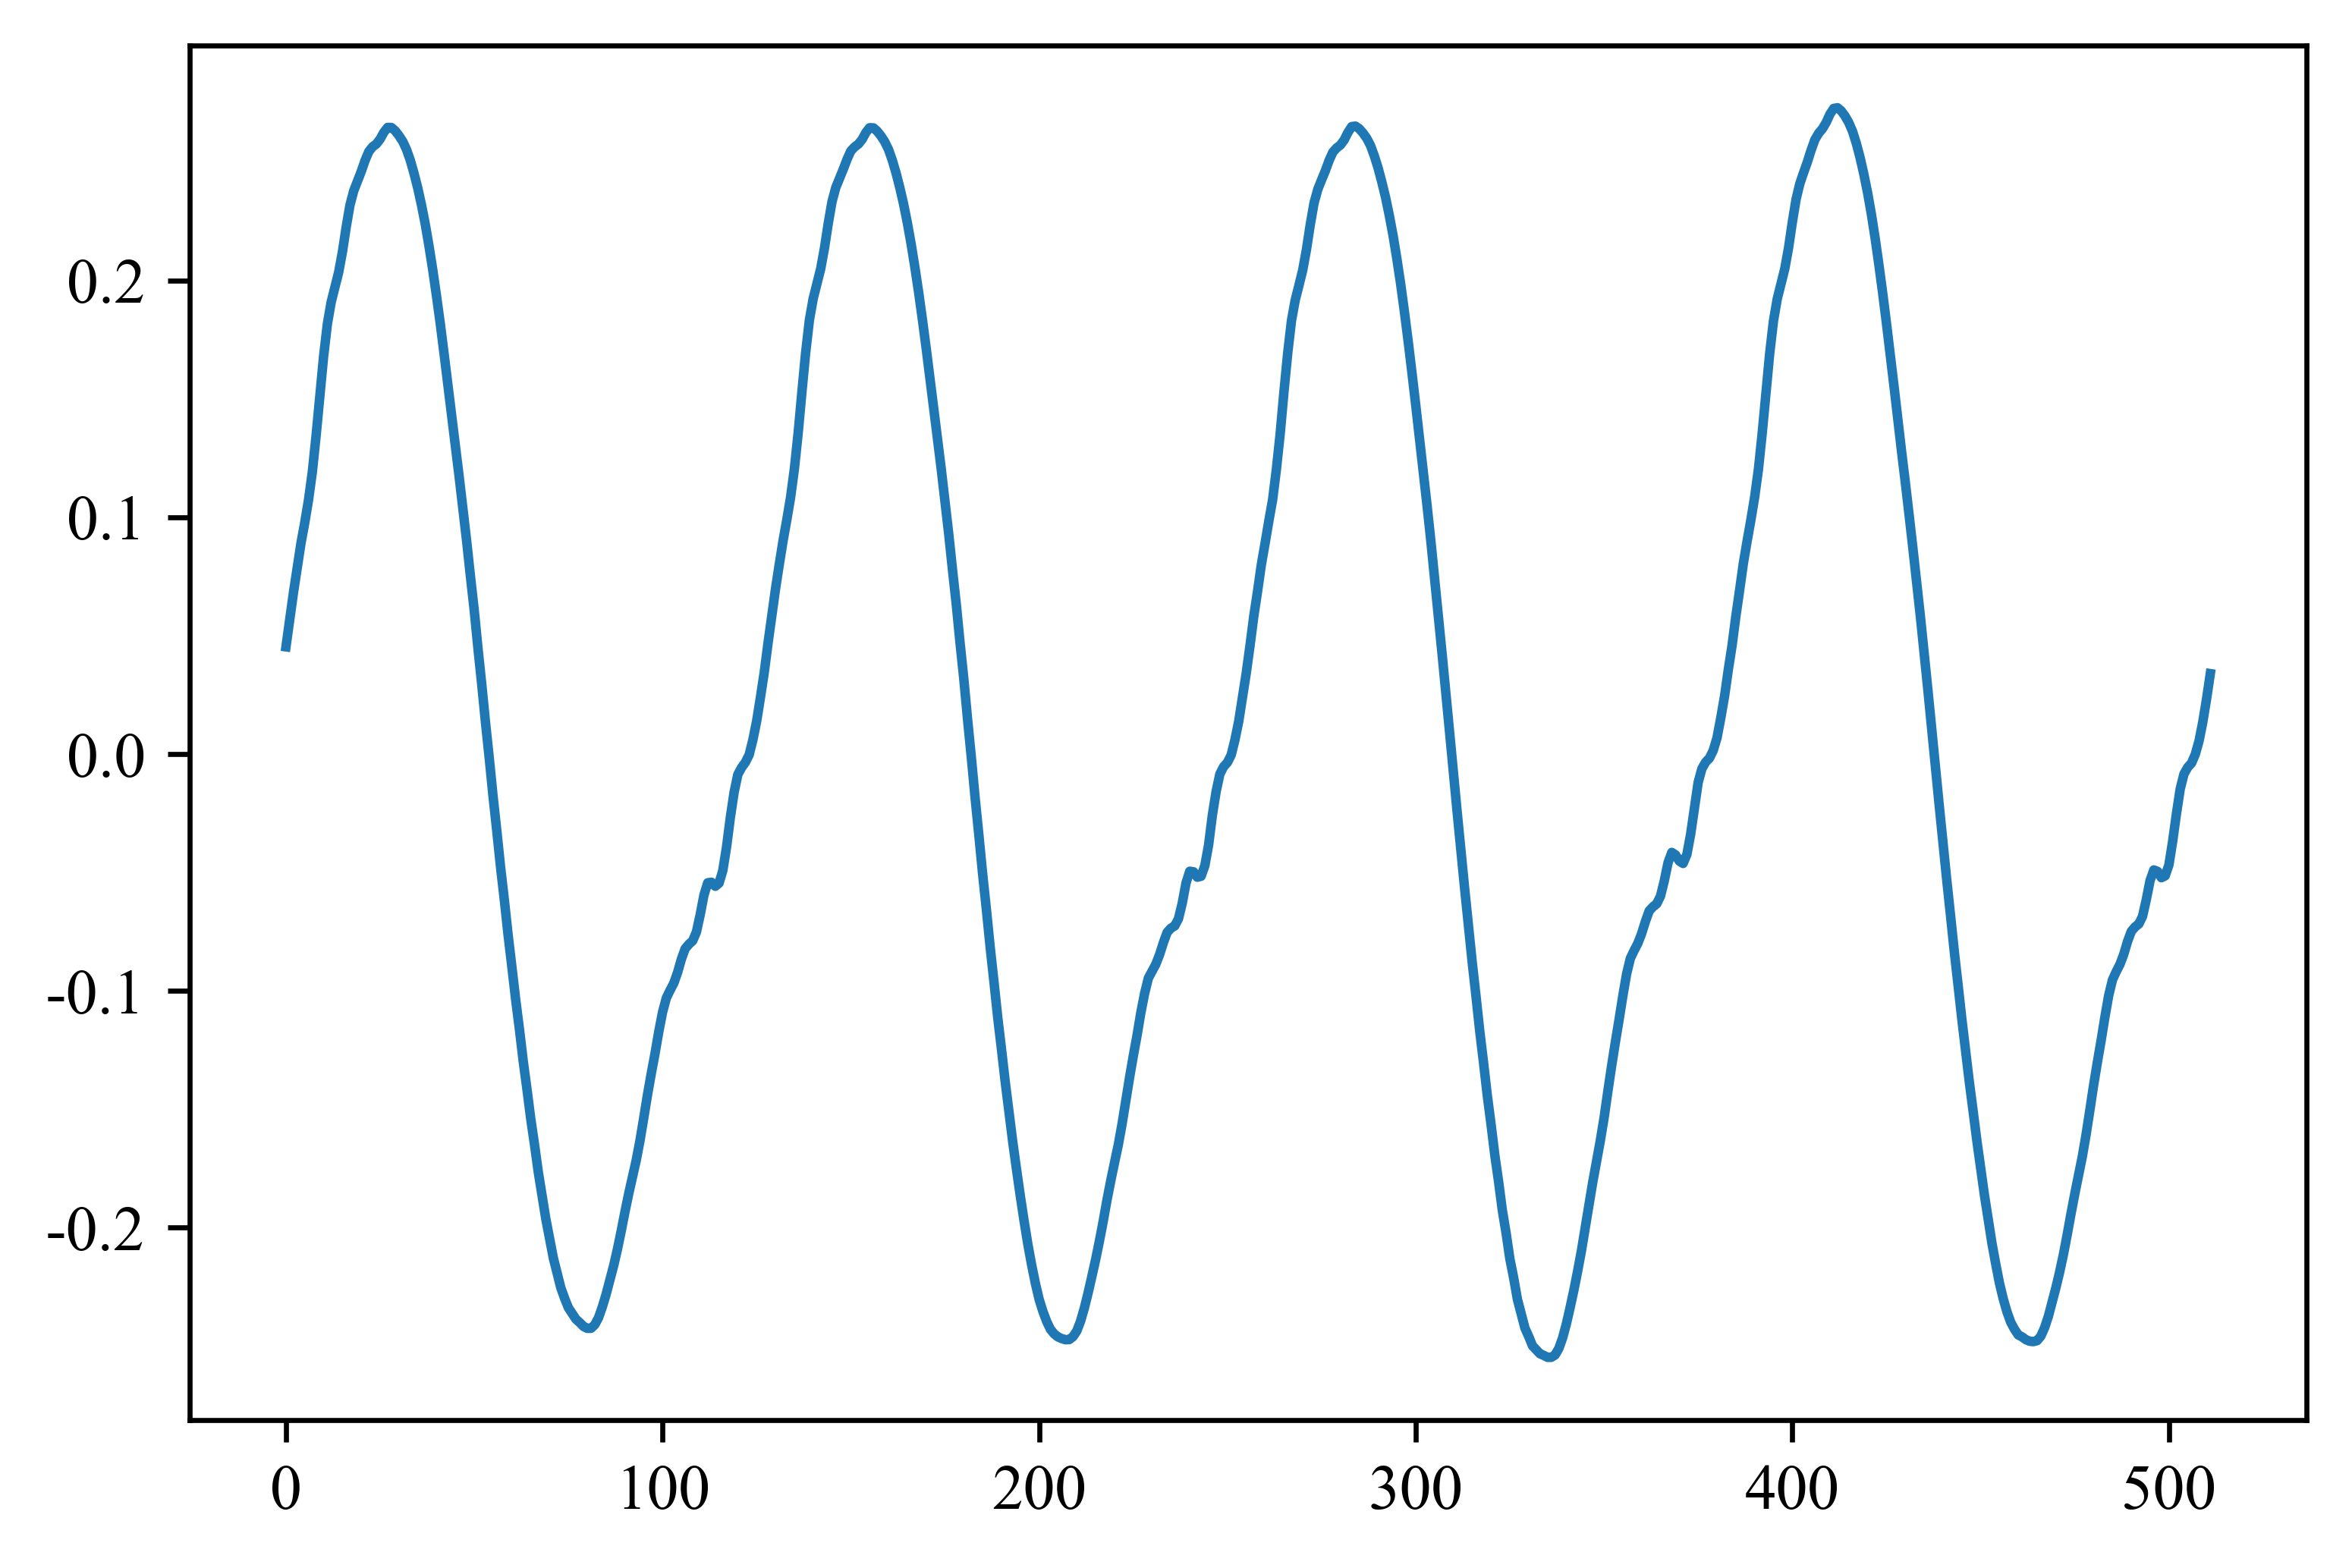

In [35]:
uy_phase_aver = np.average(np.array(case.uy_2D)*(1-np.array(case.f_2D))**10, axis=0)
plt.plot(uy_phase_aver[:,85]/0.25)

In [40]:
""" Quantitative test for Miles """
quant = (0.035+0.046)/2
W = 0.5
beta = np.pi/(case.ak)**2*W**2*quant*case.k
print(beta/850*(case.ustar/case.wave.c)**2)
print(case.Fp_aver*case.wave.c/case.E_rms[0]/case.wave.omega)

0.0009308933455544821
0.001862041727857028


In [13]:
""" PROCESSING: Load the aux case file. """
def prep_1D (case):
    version = '_tiger'
    picklename = case.path + 'case' + version + '.pkl'
    case_aux = load_object(picklename)
    for j in range(0, np.size(case_aux.t)):
        case_aux.interface[j].stress(case_aux.tau0,case_aux.mu2)
    case.taunu_all = [np.roll(np.average(interface.tau_nux, axis=0), -(interface.idx), axis=0) for interface in case_aux.interface]

prep_1D (case1)
prep_1D (case2)
prep_1D (case3)
prep_1D (case4)
prep_1D (case5)
prep_1D (case6)
prep_1D (case7)
prep_1D (case9)
prep_1D (case11)

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


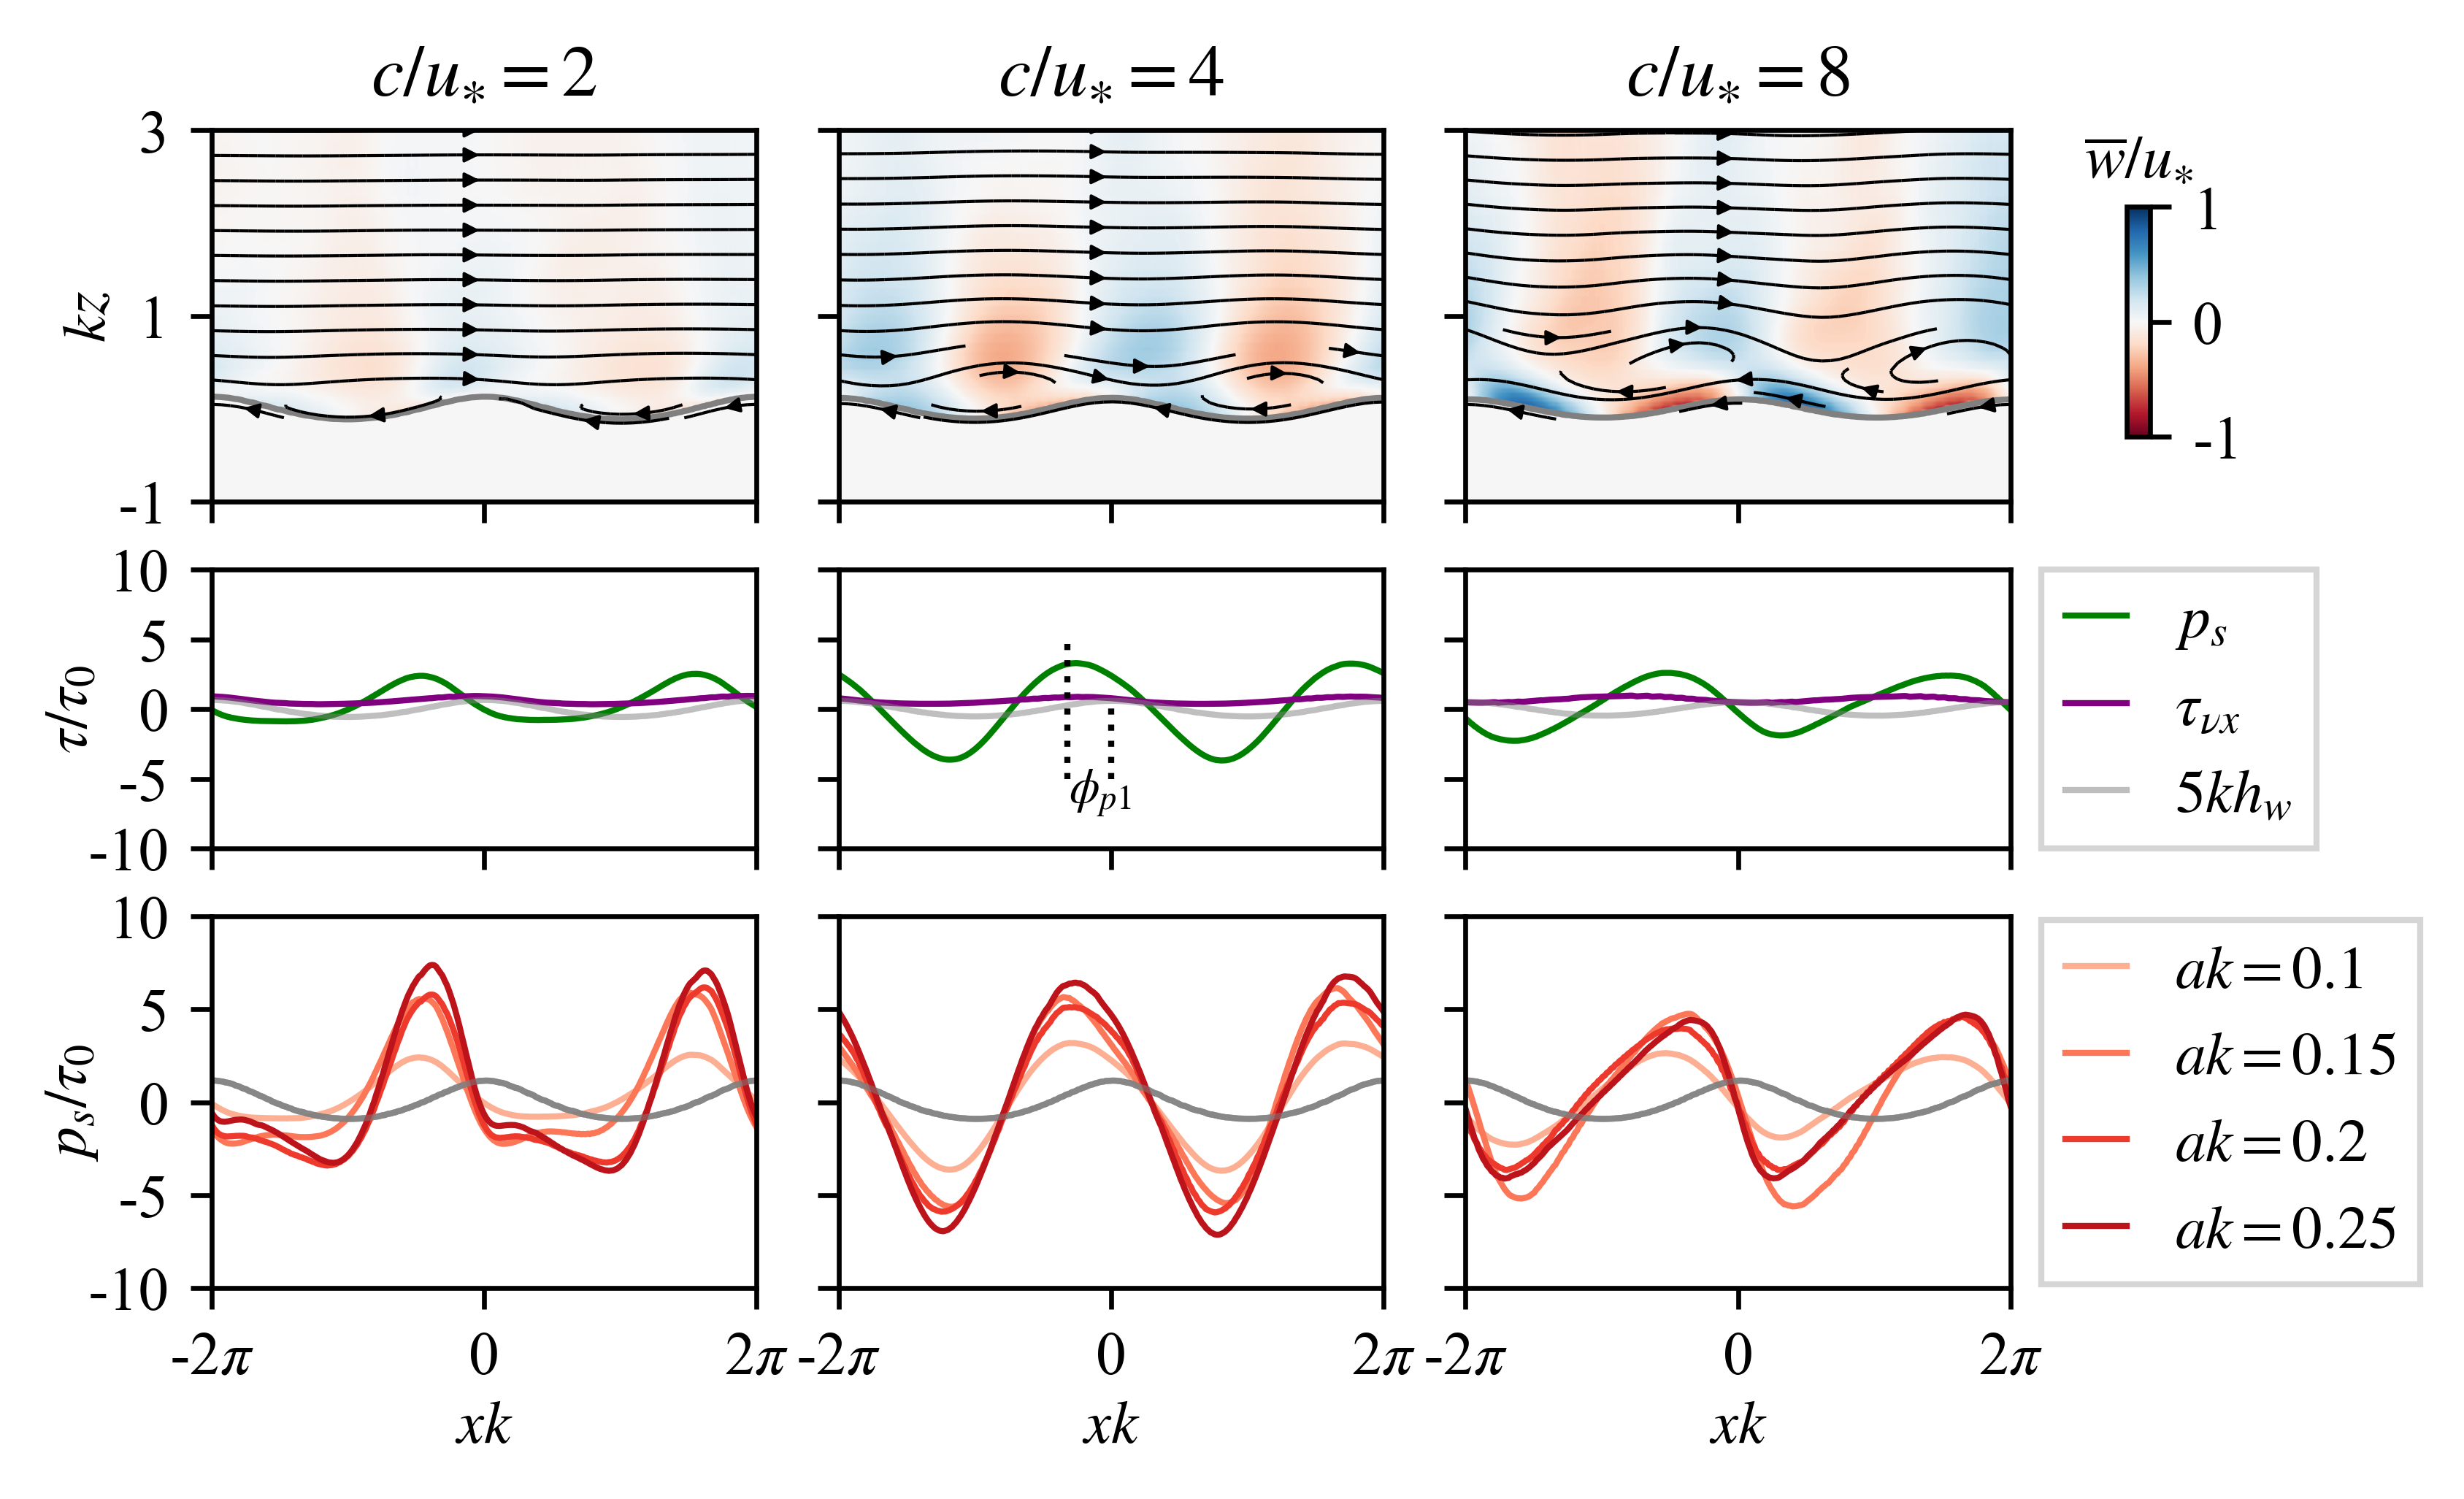

In [75]:
""" FIGURE: draw streamlines with underlying phase averaged vertical velocity. """
from matplotlib.ticker import FuncFormatter, MultipleLocator
fig, axes = plt.subplots(3, 3, sharey='row', sharex=True, figsize=[5.3,3.5], gridspec_kw={'height_ratios':[2,1.5,2], "wspace":0.15, "hspace":0.2})

def plot_streamline (case, ax):
    ux_phase_aver = np.average((np.array(case.ux_2D) - case.wave.c)*(1-np.array(case.f_2D))**10, axis=0) 
    uy_phase_aver = np.average(np.array(case.uy_2D)*(1-np.array(case.f_2D))**10, axis=0)
    NGRID = 512; NSLICE = 256; L0 = 2*np.pi
    xarray = (np.linspace(-L0/2.,L0/2.,NGRID,endpoint=True)+L0/2**NGRID/2)*case.k
    yarray = (np.linspace(-1.,L0-1,NGRID,endpoint=True)+L0/2**NGRID/2)*case.k
    X, Y = np.meshgrid(xarray, yarray)
    trunc = 160
    img = ax.imshow(np.rot90(uy_phase_aver/0.25), cmap='RdBu', extent=[-case.k*L0/2.,case.k*L0/2.,-1*case.k,(L0-1)*case.k],
                    vmax = 1, vmin = -1, aspect='auto')
    ax.plot(xarray[128:-128], np.roll((np.average(case.phase['eta'][-1], axis=0)-1)*case.k, -case.phase['idx'][-1], axis=0)[128:-128], c='gray', lw=1)
    ax.streamplot(X[0:trunc,128:-128], Y[0:trunc,128:-128], np.rot90(ux_phase_aver,3)[0:trunc,128:-128], np.rot90(-uy_phase_aver,3)[0:trunc,128:-128], 
                  density=[2,1], linewidth=0.5, arrowsize=0.5, color='k')
    ax.xaxis.set_major_formatter(FuncFormatter(
       lambda val,pos: '{:.0g}$\pi$'.format(val/np.pi) if val !=0 else '0'
    ))
    ax.xaxis.set_major_locator(MultipleLocator(base=2*np.pi))
    ax.set_xlim([-2*np.pi,2*np.pi])
    ax.set_ylim([-1,3])
    ax.get_yaxis().set_visible('False')
    ax.set_yticks(np.arange(-1,4,2))
    ax.set_title(r'$c/u_{\ast}=%.0f$' %(case.wave.c/case.ustar))
    return img
  
def plot_1D (case, ax):
    case.tau0 = case.rho2*case.ustar**2
    p2D_aver = np.average(case.p['p_2D'], axis=0) # Averaged air pressure, p_2D has already gone through *f and -average
    eta = np.roll(np.average(case.phase['eta'][-1], axis=0), -case.phase['idx'][-1], axis=0) - 1 # Last frame of eta
    p2D_aver_interp, zgrid = array_newcoord(p2D_aver, case=case, eta=eta)
    NGRID = 512; NSLICE = 256; L0 = 2*np.pi
    xarray = (np.linspace(-L0/2.,L0/2.,NGRID,endpoint=True)+L0/2**NGRID/2)*case.k
    ax.plot(xarray, p2D_aver_interp[:,88]/case.tau0, c='green', lw=1, label=r'$p_s$')
    ax.plot(xarray, np.average(case.taunu_all, axis=(0))/case.tau0, c='purple', lw=1, label=r'$\tau_{\nu x}$')
    ax.plot(xarray, (eta)*case.k*5, c='gray', alpha=0.5, lw=1, label=r'$5kh_w$')
    ax.set_ylim([-5,5])
    ax.set_yticks(np.arange(-10,15,5))
#     ax.text(0.05, 0.1, r'$c/u_* = %.0f$' % (case.wave.c/case.ustar), transform=ax.transAxes)

# pcontour = plot_streamline (case1, axes[0,0])
# pcontour = plot_streamline (case2, axes[0,1])
# pcontour = plot_streamline (case3, axes[0,2])
# plot_1D (case1, axes[1,0])
# plot_1D (case2, axes[1,1])
# plot_1D (case3, axes[1,2])

pcontour = plot_streamline (case4, axes[0,0])
pcontour = plot_streamline (case5, axes[0,1])
pcontour = plot_streamline (case6, axes[0,2])
plot_1D (case4, axes[1,0])
plot_1D (case5, axes[1,1])
plot_1D (case6, axes[1,2])

# rect : This parameter is the dimensions [left, bottom, width, height] of the new axes.
# projection : This parameter is the projection type of the Axes.
# cb_ax = fig.add_axes([0.95, 0.62, 0.01, 0.3])
# cbar = fig.colorbar(img, orientation="vertical", cax=cb_ax)
# cbar.ax.text(0.5, 1.1, r'$\overline{w}/u_{*}$', ha='center', va='center', transform=cbar.ax.transAxes)

cb_ax = fig.add_axes([0.95, 0.68, 0.01, 0.15])
v1 = np.linspace(-1, 1, 3, endpoint=True)
cbar = fig.colorbar(pcontour, orientation="vertical", cax=cb_ax, ticks=v1)
cbar.ax.text(0.5, 1.2, r'$\overline{w}/u_{\ast}$', ha='center', va='center', transform=cbar.ax.transAxes)

axes[0,0].get_yaxis().set_visible('True')
axes[0,0].set_ylabel(r'$kz$', labelpad=0)
axes[1,0].set_ylabel(r'$\tau/\tau_0$', labelpad=-2)
axes[1,2].legend(loc='center left', fancybox=False, bbox_to_anchor=(1, 0.5), handlelength=1)

# fig = plt.figure(figsize=[4,1.5]); ax = plt.gca()
NGRID = 512
# Pick some random eta 
case = case7
xarray = (np.linspace(-case.L0/2.,case.L0/2.,NGRID,endpoint=True)+case.L0/2**NGRID/2)*case.k
eta = np.roll(np.average(case.phase['eta'][-1], axis=0), -case.phase['idx'][-1], axis=0) - 1 # Last frame of eta

def plot_1D_ak (case, ax, cc, height):
    case.tau0 = case.rho2*case.ustar**2
    p2D_aver = np.average(case.p['p_2D'], axis=0) # Averaged air pressure, p_2D has already gone through *f and -average
    p2D_aver_interp, zgrid = array_newcoord(p2D_aver, case=case, eta=eta)
    ax.plot(xarray[128:-128], p2D_aver_interp[:,height][128:-128]/case.tau0, c=cc, lw=1, label=r'$ak=%g$' %case.ak)
    ax.plot(xarray, (eta)*case.k*5, c='gray', lw=1, alpha=0.5)
    ax.set_ylim([-10,10])
    ax.set_yticks(np.arange(-10,15,5))
    ax.set_xlabel(r'$xk$', labelpad=2)
    return 

cc_list = (cmap(33),cmap(35),cmap(37),cmap(39))
for case,cc in zip((case4,case7,case1,case14),cc_list):
    plot_1D_ak(case, axes[2,0], cc, height=88)
for case,cc in zip((case5,case9,case2,case15),cc_list):
    plot_1D_ak(case, axes[2,1], cc, height=88)
for case,cc in zip((case6,case11,case3,case16),cc_list):
    p = plot_1D_ak(case, axes[2,2], cc, height=88)
axes[2,0].set_ylabel(r'$p_s/\tau_0$', labelpad=-2)
l = axes[2,2].legend(loc='center left', bbox_to_anchor=(1, 0.5), fancybox=False, handlelength=1)

# ax.xaxis.set_major_formatter(FuncFormatter(
#    lambda val,pos: '{:.0g}$\pi$'.format(val/np.pi) if val !=0 else '0'
# ))
# ax.xaxis.set_major_locator(MultipleLocator(base=2*np.pi))
# ax.set_xlim([-2*np.pi,2*np.pi])

""" Denote phi_p """
x = np.ones(20); tau1 = np.linspace(-5,0.1,20); tau2 = np.linspace(-5,4.9,20)
axes[1,1].plot(x*0, tau1, ':', c='k', lw=1)
axes[1,1].plot(x*(-1), tau2, ':', c='k', lw=1)
axes[1,1].text(0.48, 0.2, r'$\phi_{p1}$', ha='center', va='center', rotation=0., fontsize=8, transform=axes[1,1].transAxes)
fig.savefig('figures_jfm/streamline_pshape2.pdf', bbox_inches='tight')
fig.savefig('figures_jfm/streamline_pshape2.eps', bbox_inches='tight')

Text(0.48, 0.15, '$\\phi_p$')

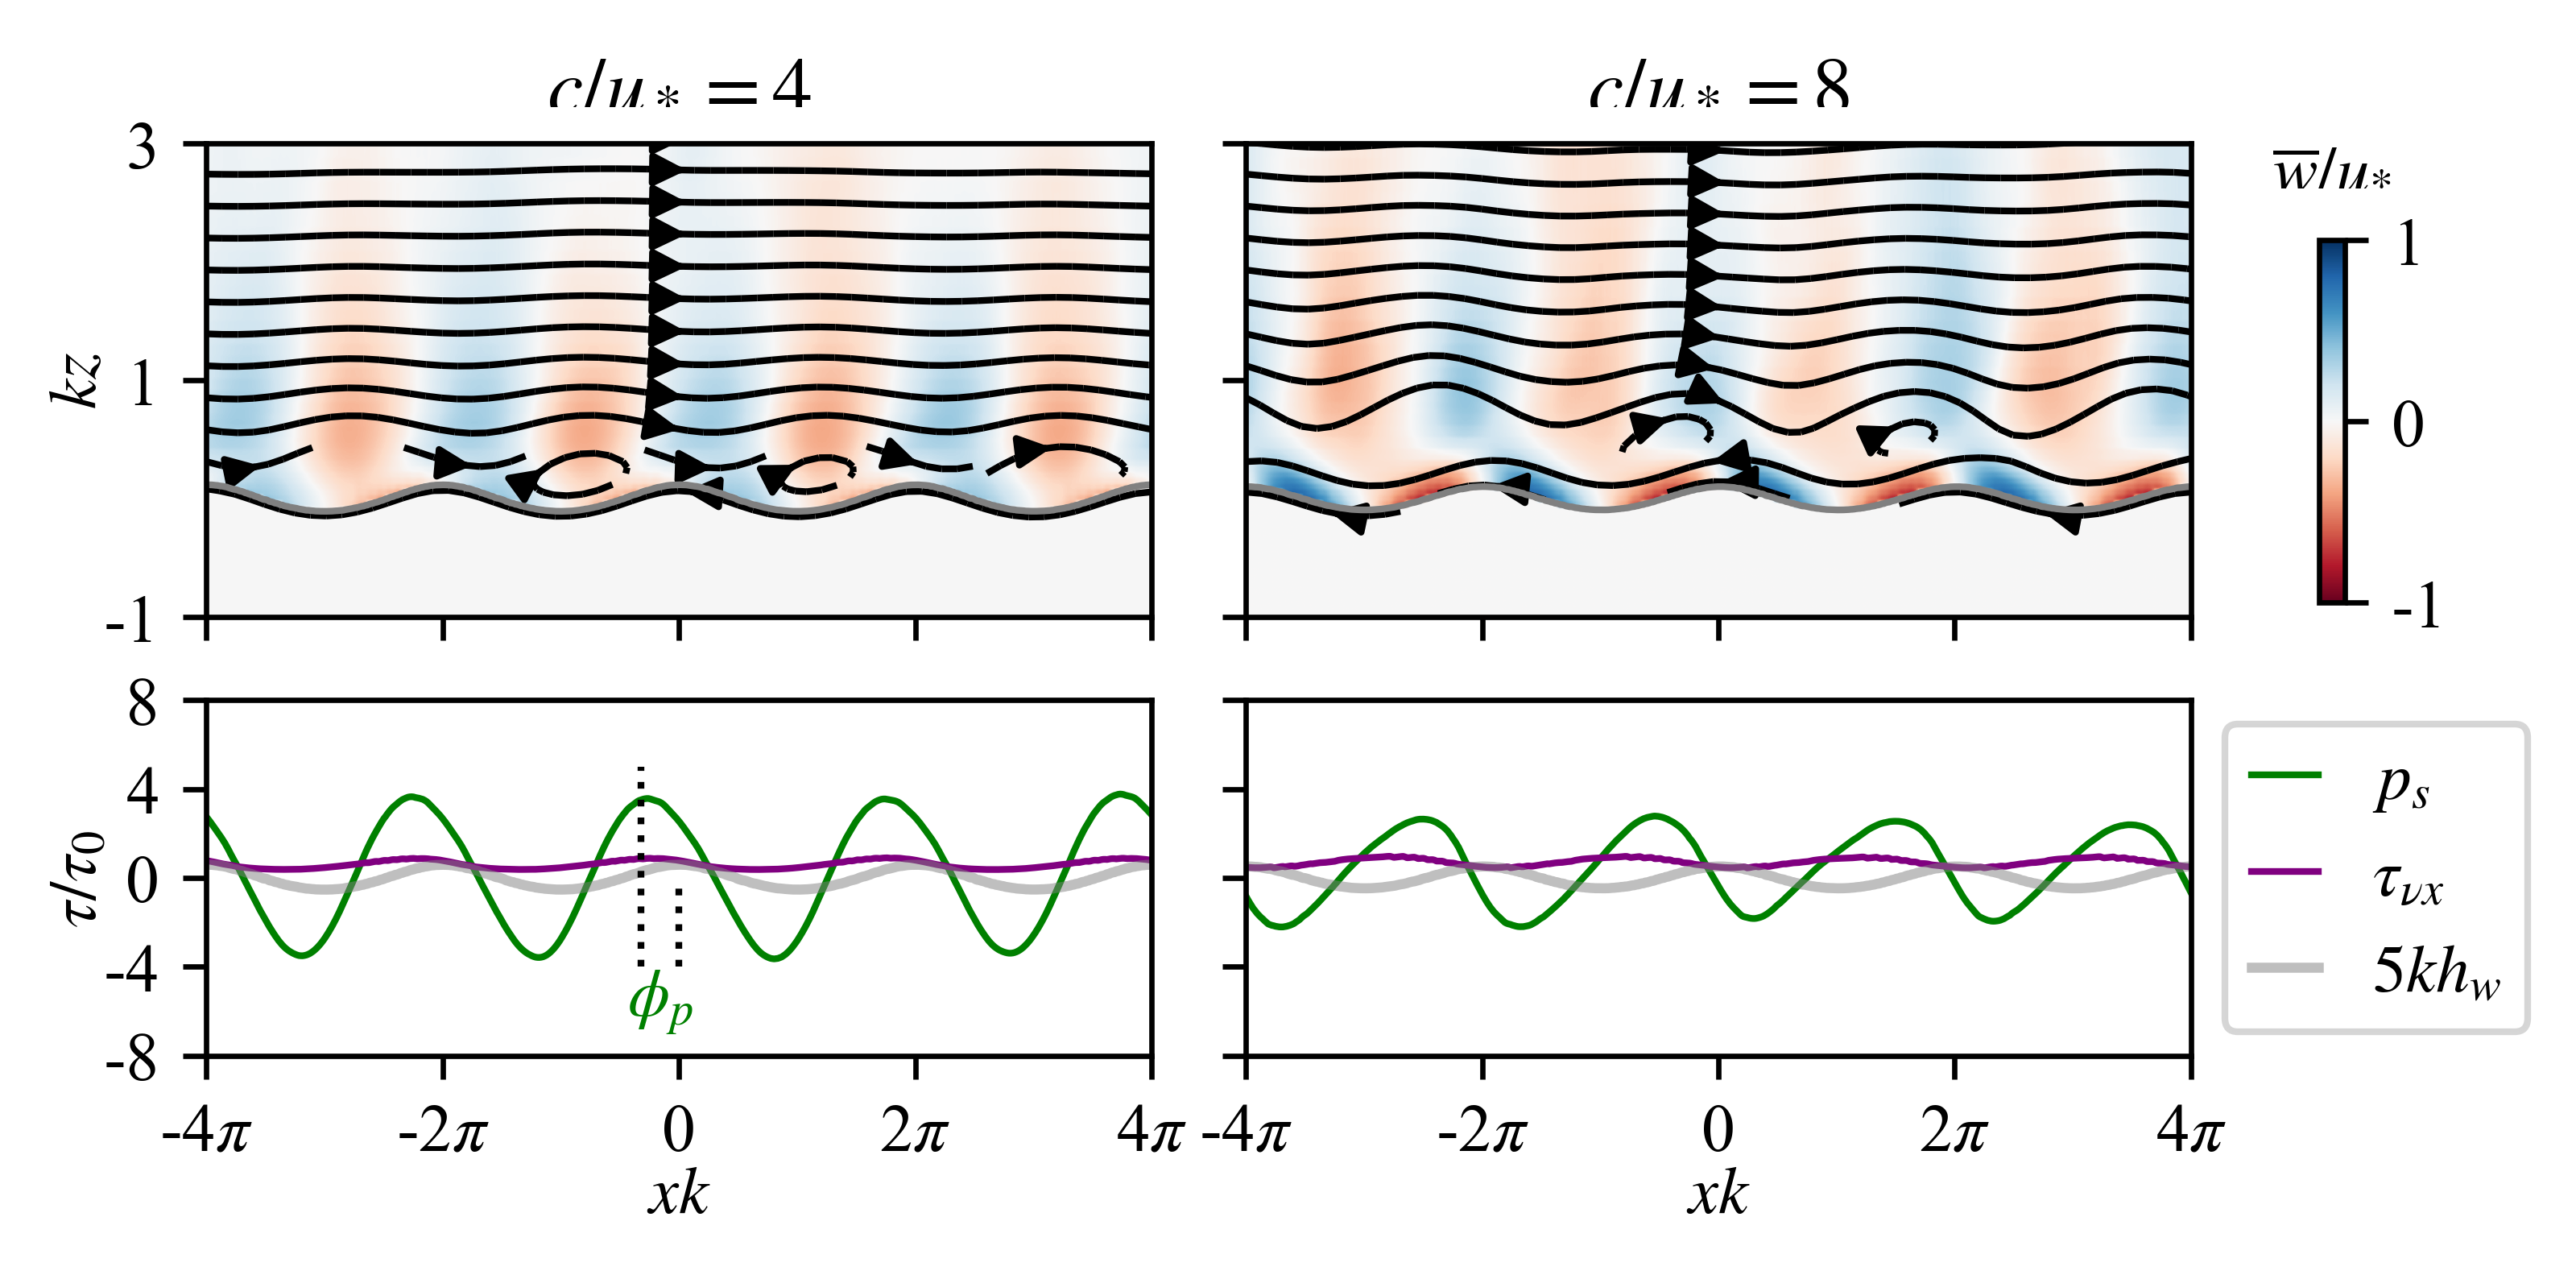

In [72]:
""" FIGURE: draw streamlines with underlying phase averaged vertical velocity. """
from matplotlib.ticker import FuncFormatter, MultipleLocator
fig, axes = plt.subplots(2, 2, sharey='row', sharex=True, figsize=[5.3,2.5], gridspec_kw={'height_ratios':[2,1.5], "wspace":0.1, "hspace":0.2})

def plot_streamline (case, ax):
    ux_phase_aver = np.average((np.array(case.ux_2D) - case.wave.c)*(1-np.array(case.f_2D))**10, axis=0) 
    uy_phase_aver = np.average(np.array(case.uy_2D)*(1-np.array(case.f_2D))**10, axis=0)
    NGRID = 512; NSLICE = 256; L0 = 2*np.pi
    xarray = (np.linspace(-L0/2.,L0/2.,NGRID,endpoint=True)+L0/2**NGRID/2)*case.k
    yarray = (np.linspace(-1.,L0-1,NGRID,endpoint=True)+L0/2**NGRID/2)*case.k
    X, Y = np.meshgrid(xarray, yarray)
    trunc = 160
    img = ax.imshow(np.rot90(uy_phase_aver/0.25), cmap='RdBu', extent=[-case.k*L0/2.,case.k*L0/2.,-1*case.k,(L0-1)*case.k],
                    vmax = 1, vmin = -1, aspect='auto')
    ax.streamplot(X[0:trunc,:], Y[0:trunc,:], np.rot90(ux_phase_aver,3)[0:trunc,:], np.rot90(-uy_phase_aver,3)[0:trunc,:], 
                  density=[2,1], linewidth=1, color='k')
    ax.plot(xarray, np.roll((np.average(case.phase['eta'][-1], axis=0)-1)*case.k, -case.phase['idx'][-1], axis=0), c='gray', lw=1)
    ax.xaxis.set_major_formatter(FuncFormatter(
       lambda val,pos: '{:.0g}$\pi$'.format(val/np.pi) if val !=0 else '0'
    ))
    ax.xaxis.set_major_locator(MultipleLocator(base=2*np.pi))
    ax.set_xlim([-4*np.pi,4*np.pi]); ax.set_ylim([-1,3])
    ax.get_yaxis().set_visible('False')
    ax.set_yticks(np.arange(-1,4,2))
    ax.set_title(r'$c/u_*=%.0f$' %(case.wave.c/case.ustar))
    return img
  
def plot_1D (case, ax):
    L0 = 2*np.pi; NGRID = 512
    case.tau0 = case.rho2*case.ustar**2
    p2D_aver = np.average(case.p['p_2D'], axis=0) # Averaged air pressure, p_2D has already gone through *f and -average
    eta = np.roll(np.average(case.phase['eta'][-1], axis=0), -case.phase['idx'][-1], axis=0) - 1 # Last frame of eta
    p2D_aver_interp, zgrid = array_newcoord(p2D_aver, case=case, eta=eta)

    xarray = (np.linspace(-L0/2.,L0/2.,NGRID,endpoint=True)+L0/2**NGRID/2)*case.k
    ax.plot(xarray, p2D_aver_interp[:,85]/case.tau0, c='green', label=r'$p_s$', lw=1)
    ax.plot(xarray, np.average(case.taunu_all, axis=(0))/case.tau0, c='purple', label=r'$\tau_{\nu x}$', lw=1)
    ax.plot(xarray, (eta)*case.k*5, c='gray', alpha=0.5, label=r'$5kh_w$')
    ax.set_ylim([-8,8])
    ax.set_yticks(np.arange(-8,12,4))
#     ax.text(0.05, 0.1, r'$c/u_* = %.0f$' % (case.wave.c/case.ustar), transform=ax.transAxes)


# pcontour = plot_streamline (case4, axes[0,0])
pcontour = plot_streamline (case5, axes[0,0])
pcontour = plot_streamline (case6, axes[0,1])
plot_1D (case5, axes[1,0])
plot_1D (case6, axes[1,1])


# rect : This parameter is the dimensions [left, bottom, width, height] of the new axes.
# projection : This parameter is the projection type of the Axes.
cb_ax = fig.add_axes([0.95, 0.5, 0.01, 0.3])
v1 = np.linspace(-1, 1, 3, endpoint=True)
cbar = fig.colorbar(pcontour, orientation="vertical", cax=cb_ax, ticks=v1)
cbar.ax.text(0.5, 1.2, r'$\overline{w}/u_{*}$', ha='center', va='center', transform=cbar.ax.transAxes)

axes[0,0].get_yaxis().set_visible('True')
axes[0,0].set_ylabel(r'$kz$', labelpad=-1)
axes[1,0].set_ylabel(r'$\tau/\tau_0$', labelpad=-1)
axes[1,1].legend(loc='center left', bbox_to_anchor=(1, 0.5), handlelength=1)
axes[1,0].set_xlabel(r'$xk$',labelpad=0)
axes[1,1].set_xlabel(r'$xk$',labelpad=0)


""" Denote phi_p """
x = np.ones(20); tau1 = np.linspace(-4,0,20); tau2 = np.linspace(-4,5,20)
axes[1,0].plot(x*0, tau1, ':', c='k', lw=1)
axes[1,0].plot(x*(-1), tau2, ':', c='k', lw=1)
axes[1,0].text(0.48, 0.15, r'$\phi_p$', c='green', ha='center', va='center', rotation=0., transform=axes[1,0].transAxes)
# fig.tight_layout()
# fig.savefig('figures/streamline_ak01.pdf', bbox_inches='tight', pad_inches=0.1)
# fig.savefig('figures_jfm/streamline_ak01.pdf', bbox_inches='tight', pad_inches=0.1)
# fig.savefig('figures_jfm/streamline_ak01.eps', bbox_inches='tight', pad_inches=0.1)

In [ ]:
fig = plt.figure(figsize=[4,1.5]); ax = plt.gca()
L0 = 2*np.pi; NGRID = 512
case = case7
xarray = (np.linspace(-L0/2.,L0/2.,NGRID,endpoint=True)+L0/2**NGRID/2)*case.k
eta = np.roll(np.average(case.phase['eta'][-1], axis=0), -case.phase['idx'][-1], axis=0) - 1 # Last frame of eta
ax.plot(xarray, (eta)*case.k*5, c='gray', alpha=0.5, label=r'$5kh_w$')

def plot_1D (case, ax, cc, height):
    case.tau0 = case.rho2*case.ustar**2
    p2D_aver = np.average(case.p['p_2D'], axis=0) # Averaged air pressure, p_2D has already gone through *f and -average
    p2D_aver_interp, zgrid = array_newcoord(p2D_aver, case=case, eta=eta)
    ax.plot(xarray, p2D_aver_interp[:,height]/case.tau0, c=cc, label=r'$p_s$', lw=1)
#     ax.plot(xarray, (eta)*case.k*5, c='gray', alpha=0.5, label=r'$5kh_w$')
#     ax.set_ylim([-10,10])
    ax.set_yticks(np.arange(-10,15,5))

cc_list = (cmap(33),cmap(35),cmap(37),cmap(39))
for case,cc in zip((case4,case7,case1,case14),cc_list):
    plot_1D(case, ax, cc, height=92)

ax.xaxis.set_major_formatter(FuncFormatter(
   lambda val,pos: '{:.0g}$\pi$'.format(val/np.pi) if val !=0 else '0'
))
ax.xaxis.set_major_locator(MultipleLocator(base=2*np.pi))
ax.set_xlim([-4*np.pi,4*np.pi])

In [ ]:
fig = plt.figure(figsize=[4,1.5]); ax = plt.gca()
L0 = 2*np.pi; NGRID = 512
case = case7
xarray = (np.linspace(-L0/2.,L0/2.,NGRID,endpoint=True)+L0/2**NGRID/2)*case.k
eta = np.roll(np.average(case.phase['eta'][-1], axis=0), -case.phase['idx'][-1], axis=0) - 1 # Last frame of eta
ax.plot(xarray, (eta)*case.k*5, c='gray', alpha=0.5, label=r'$5kh_w$')

cc_list = (cmap(33),cmap(35),cmap(37),cmap(39))
for case,cc in zip((case5,case9,case2,case15),cc_list):
    plot_1D(case, ax, cc, height=88)

ax.xaxis.set_major_formatter(FuncFormatter(
   lambda val,pos: '{:.0g}$\pi$'.format(val/np.pi) if val !=0 else '0'
))
ax.xaxis.set_major_locator(MultipleLocator(base=2*np.pi))
ax.set_xlim([-4*np.pi,4*np.pi])

In [ ]:
fig = plt.figure(figsize=[4,1.5]); ax = plt.gca()
L0 = 2*np.pi; NGRID = 512
case = case7
xarray = (np.linspace(-L0/2.,L0/2.,NGRID,endpoint=True)+L0/2**NGRID/2)*case.k
eta = np.roll(np.average(case.phase['eta'][-1], axis=0), -case.phase['idx'][-1], axis=0) - 1 # Last frame of eta
ax.plot(xarray, (eta)*case.k*5, c='gray', alpha=0.5, label=r'$5kh_w$')

cc_list = (cmap(33),cmap(35),cmap(37),cmap(39))
for case,cc in zip((case6,case11,case3,case16),cc_list):
    plot_1D_ak(case, ax, cc, height=88)

ax.xaxis.set_major_formatter(FuncFormatter(
   lambda val,pos: '{:.0g}$\pi$'.format(val/np.pi) if val !=0 else '0'
))
ax.xaxis.set_major_locator(MultipleLocator(base=2*np.pi))
ax.set_xlim([-4*np.pi,4*np.pi])

In [ ]:
""" CHECK: whether the stress add up to 1. """
version = '_tiger'
fig = plt.figure(figsize=[4,2])
for case in (case2,case3,case4,case5,case6):
    picklename = case.path + 'case' + version + '.pkl'
    case_aux = load_object(picklename)
    for j in range(0, np.size(case_aux.t)):
        case_aux.interface[j].stress(case_aux.tau0,case_aux.mu2)
    shear_all = [interface.shear for interface in case_aux.interface]
    shear = np.average(shear_all)
    plt.plot(case.wave.c/case.ustar, shear/case.tau0, c=case.cc, marker='s', mfc='none', lw=0, markersize=3, alpha = 1)
    plt.plot(case.wave.c/case.ustar, case.Fp_aver/case.tau0, c=case.cc, marker='o', mfc='none', lw=0, markersize=3, alpha = 1)
    plt.plot(case.wave.c/case.ustar, (shear+case.Fp_aver)/case.tau0, c=case.cc, marker='x', mfc='none', lw=0, markersize=3, alpha = 1)

plt.xlabel(r'$c/u_*$')
plt.ylabel(r'$\tau/\rho_a u_*^2$')